In [20]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import matplotlib
%matplotlib inline

**Import Dataset**

In [3]:
dataset=datasets.fetch_mldata('MNIST Original')

AttributeError: module 'sklearn.datasets' has no attribute 'fetch_mldata'

In [3]:
dataset=datasets.fetch_openml('mnist_784')

In [4]:
dataset

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [5]:
data,label=dataset.data,dataset.target

In [6]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
label=label.astype(int)

In [9]:
label

array([5, 0, 4, ..., 4, 5, 6])

In [10]:
data.shape

(70000, 784)

In [16]:
label.shape

(70000,)

**Chhose One digit for analysis**

In [38]:
choose_one_digit=data[6700]

In [27]:
image=choose_one_digit.reshape(28,28)

Here, interpolation='nearest' simply displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution. It will result an image in which pixels are displayed as a square of multiple pixels.

There is no relation between interpolation='nearest' and the grayscale image being displayed in color. By default imshow uses the jet colormap to display an image. If you want it to be displayed in greyscale, call the gray() method to select the gray colormap.

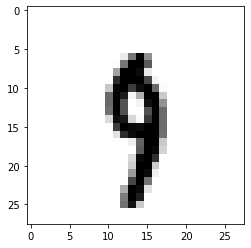

In [21]:
plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [29]:
#choose_one_digit=data[2600]
label[2600]

9

**Split Dataset in Train and Test**

In [25]:
x_train,y_train=data[:2500],label[:2500]

In [26]:
x_test,y_test=data[2500:5000],label[2500:5000]

**The next step is to create a Linear SVM object. Since there are 10 digits (0-9), we need a multi-class classifier. The Linear SVM that comes with sklearn can perform multi-class classification.**

In [27]:
clf=LinearSVC()

In [34]:
clf.fit(x_train, y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [35]:
clf.predict(data[1:10])

array([0, 4, 1, 9, 2, 1, 3, 1, 4])

In [36]:
label[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4])

**As we can see, our predicted value and actual value are same. So, we conclude that our model is working some how perfectly.**

**Now, Lets calculate accuracy of this LinearSVC classification.**

In [23]:
from sklearn.model_selection import cross_val_score

In [50]:
a=cross_val_score(clf,x_train,y_train,cv=3,scoring="accuracy")

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
a.mean()

0.8200018616559334

**--> Create a 9 detector model using Logisctic regression**

In [28]:
y_train_9=(y_train==9)

In [29]:
y_train_9

array([False, False, False, ..., False, False, False])

In [30]:
y_test_9=(y_test==9)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf2=LogisticRegression()

In [33]:
clf2.fit(x_train,y_train_9)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#choose_one_digit is original Nine 
clf2.predict([choose_one_digit])

array([ True])

**We can conclude that predicted value for this image nine is true.**

**Now, Lets calculate accuracy of this Logistic Regression classification.**

In [35]:
b=cross_val_score(clf,x_train,y_train_9,cv=3,scoring="accuracy")

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
b

array([0.93285372, 0.92797119, 0.92677071])

In [37]:
b.mean()

0.9291985379283608

In [39]:
#choose_one_digit=6700 label=0
clf2.predict([choose_one_digit])

array([False])

**It's shows value is false. that means this digit is not 9 digit.**

In [44]:
label[6700]

0

`Conclusion:`

**Average Accuracy of LinearSCV= 0.82**

**Average Accuracy of Logistic Regression= 0.93**